In [1]:
# Investigate Numeric relationships and use a different scalar
# Find a better way to deal with NA's
# Need to work out which variable are correlated to drop
# Need to see if any variables are duplicated
# Need to see if any variables are constant for both above and under 50K
# how are you dealing with class inbalance

In [2]:
import pandas as pd
from config import config
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
import preprocessors
from pipeline import income_pipeline
from helpers import get_meta_columns
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

In [3]:
data = pd.read_csv(config.TRAIN_DIR, names=get_meta_columns(), na_values=' ?')

# # encodes the target variable as binary
data[config.TARGET] = data[config.TARGET].map(config.TARGET_ENCODING)
 
X_train, X_test, y_train, y_test = train_test_split(
         data[config.FEATURES], data[config.TARGET], test_size=0.2, random_state=0
         )  

In [4]:
visualisation_pipeline = Pipeline(
    [
        (
            "EncodeNotInUniverse",
            preprocessors.EncodeNotInUniverse(variables=config.FEATURES),
        ),
        (
            "DropNaFeatures",
            preprocessors.DropDuplicates(variables=config.DUPLICATE_VALS),
        ),
        (
            "Fill_NA_encoder",
            preprocessors.FillNAEncoder(variables=config.CATEGORICAL_VALS),
        ),
        (
            "Education Encoder",
            preprocessors.EducationEncoder(variables='education'),
        ),
    ])

X_train_processed = visualisation_pipeline.fit_transform(X_train[config.FEATURES], y_train) 

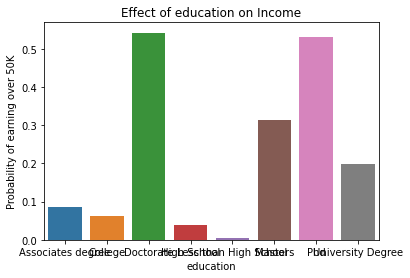

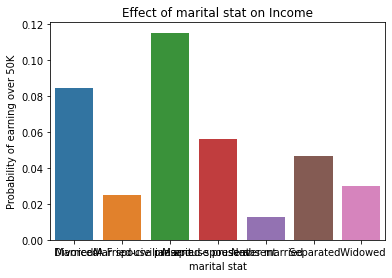

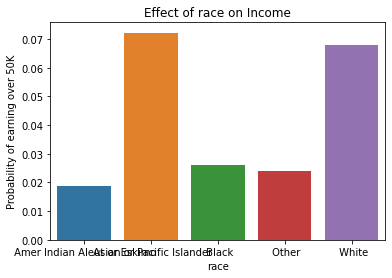

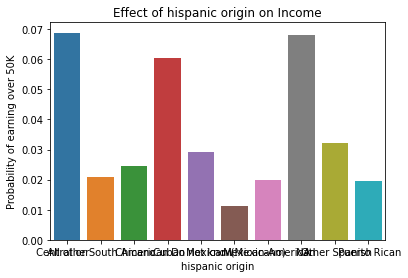

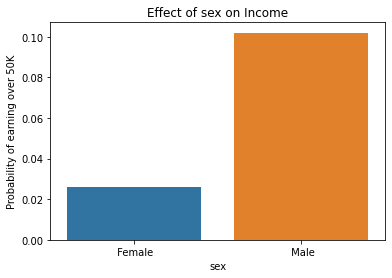

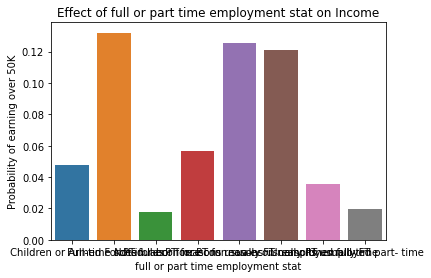

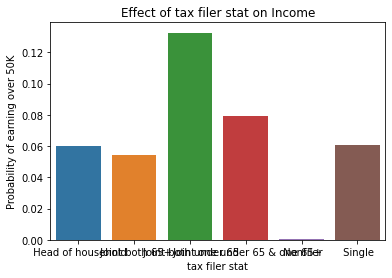

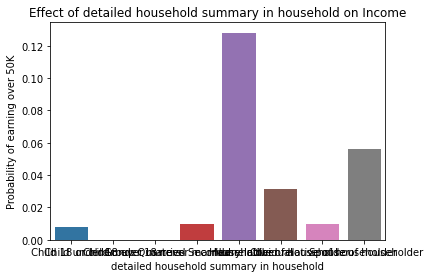

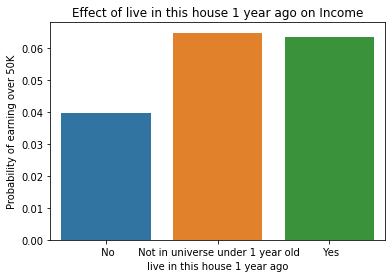

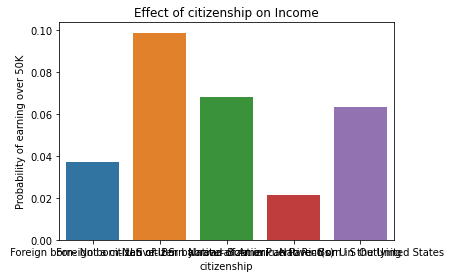

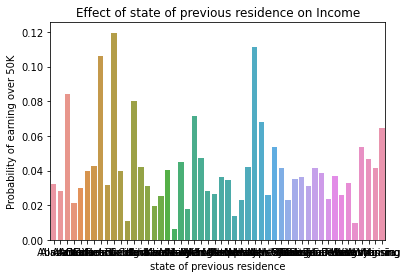

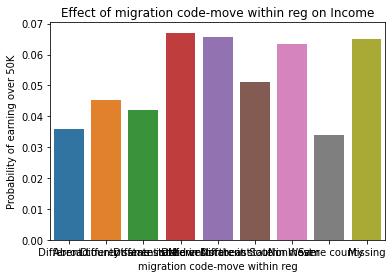

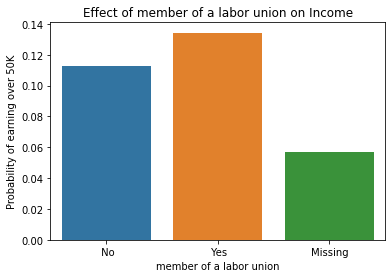

In [5]:
plotting_df = pd.DataFrame(pd.concat([X_train_processed, y_train], axis=1))

def analysis_categoricial(df, var):
    temp = df[['Income',var]].groupby(var).mean().reset_index()
    axis = sns.barplot(x=var, y='Income', data=temp)
    axis.set(ylabel ="Probability of earning over 50K")
    if var == 'eduation':
        axis.set_xticklabels(config.education_dict.keys(), rotation=90)
    plt.title(f"Effect of {var} on Income")
    plt.show()

for var in config.CATEGORICAL_VALS:
    analysis_categoricial(plotting_df, var)

# for var in config.DROP_VALS:
#     analysis_categoricial(data, var)
# 
# # Cardinality check
# for var in config.DROP_VALS:
#     print(var, len(data[var].unique()))


In [3]:
data['education'].map(config.education_dict)

0         1
1         3
2         0
3         0
4         0
         ..
199518    0
199519    0
199520    3
199521    0
199522    1
Name: education, Length: 199523, dtype: int64

,education,Income
0,0,0.003669
1,1,0.038917
2,2,0.086077
3,3,0.063411
4,4,0.199004
5,5,0.313288
6,6,0.541927
7,7,0.530672
